In [1]:
import pandas as pd
df=pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [9]:
# one hot encoding
df=pd.get_dummies(df,drop_first=True)
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Training Testing

In [10]:
x=df.drop(['Unnamed: 0','Sales'],axis=1)
x.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [11]:
y=df['Sales']
print(x.shape)
print(y.shape)

(200, 3)
(200,)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=13)

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(40, 3)
(160, 3)
(40,)
(160,)


In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)

[12.41367767  5.32067348 16.55144938 12.36717245 12.71077284 23.63881378
 21.62206727 14.74035857 22.19982768 15.32872133 16.21757736  6.10442096
  7.88988888 18.91129331 17.68863982 16.7673735   8.42129698  9.69259232
 20.29047962 17.71616686 12.01762517  7.84345791 21.58818774 12.12397718
 17.11548063 19.33168908 10.05575241 14.1727504  23.07525292  8.76424307
 15.4412187  18.25749861 17.77840777  7.04391172 16.88038275  8.86721612
 10.0519968  20.67873857  5.40059981 10.49904798]


In [19]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression

model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
print(y_pred)

[12.41367767  5.32067348 16.55144938 12.36717245 12.71077284 23.63881378
 21.62206727 14.74035857 22.19982768 15.32872133 16.21757736  6.10442096
  7.88988888 18.91129331 17.68863982 16.7673735   8.42129698  9.69259232
 20.29047962 17.71616686 12.01762517  7.84345791 21.58818774 12.12397718
 17.11548063 19.33168908 10.05575241 14.1727504  23.07525292  8.76424307
 15.4412187  18.25749861 17.77840777  7.04391172 16.88038275  8.86721612
 10.0519968  20.67873857  5.40059981 10.49904798]


In [21]:
print("coefficient: ",model.coef_)
print("intercept: ",model.intercept_)

coefficient:  [ 3.93989334  2.75338819 -0.05578497]
intercept:  13.896875


In [22]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("R2 score: ",metrics.r2_score(y_test,y_pred))

MAE:  1.180093122716239
MSE:  2.0881207094289946
R2 score:  0.9308589334107374


# -----------------------------------------------------

In [24]:
import pandas as pd

df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
# one hot encoding
df=pd.get_dummies(df,drop_first=True)
df

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1


In [28]:
from sklearn.model_selection import train_test_split

x=df[['age','bmi','smoker_yes']]
y=df['expenses']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

max=0
index=0
for i in range(1,43):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=i)
    model=LinearRegression()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    j=r2_score(y_test,y_pred)
    if(j>max):
        max=j
        index=i
    
#     print("R2 score: ",r2_score(y_test,y_pred)," random state: ",i)
    
print("r2 score: ",max)
print("random state: ",index)

r2 score:  0.801102111923785
random state:  11


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=11)

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(268, 3)
(1070, 3)
(268,)
(1070,)


In [32]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)

[27905.2052798   6075.76969321 10008.1128505   6261.38426231
 11966.65278276 11281.10640501  8040.82906983 16407.74848104
 12650.12852429 33486.06617008  7276.58805631 16202.49869496
 10682.84474361  3010.21555856  5743.8878729  36060.4323445
  4529.87685326   377.02061712  7890.1898944  13918.67327067
 10147.86065736  2287.54626699  4008.00853964  5010.25032885
  5012.397849   14577.98810316  5289.74594257  8230.81556313
 26940.16328833  7986.29534309 32876.91314012 29483.92599328
  3025.47885134  -216.86912007 31494.85213213 14126.07057689
  6296.28277207 25833.22596986 10398.97720568  8780.98605823
  6053.91007217 12971.04209211 28029.68979389  1261.29733659
  8350.92815301 11894.63135919 30966.46437416  3909.75557081
  9272.32778631 26988.17757071 13877.17843264 29654.12350177
 15813.85874385 35951.21112319 10778.87330838  3848.6255158
  6608.5293754  13431.78035072 10141.34121301  3025.47885134
  7960.06379783 14047.45282504 10990.71942273 37745.99610739
  4619.46285759  7676.1962

In [35]:
diff=pd.DataFrame({
    'Actual':y_test,'Predicted':y_pred
})
diff

,Actual,Predicted
1313,36397.58,27905.205280
1254,4415.16,6075.769693
372,7639.42,10008.112851
937,8965.80,6261.384262
484,9563.03,11966.652783
...,...,...
427,7323.73,2304.957080
1153,5630.46,8994.979693
973,1759.34,6272.198747
608,4435.09,4248.233719


In [34]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("R2 score: ",metrics.r2_score(y_test,y_pred))

MAE:  3784.361100036369
MSE:  27581739.22116713
R2 score:  0.801102111923785


## ------------------------------------------------------------------------------------------

In [40]:
import pandas as pd

df=pd.read_csv("FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [43]:
x=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y=df['CO2EMISSIONS']
print(x.shape)
print(y.shape)

(1067, 3)
(1067,)


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

max=0
index=0
for i in range(1,43):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=i)
    model=LinearRegression()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    j=r2_score(y_test,y_pred)
    if(j>max):
        max=j
        index=i
    
#     print("R2 score: ",r2_score(y_test,y_pred)," random state: ",i)
    
print("r2 score: ",max)
print("random state: ",index)

r2 score:  0.8936913135355137
random state:  12


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=12)

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(214, 3)
(853, 3)
(214,)
(853,)


In [47]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)

[214.58357275 387.83515037 369.23735994 306.26538599 185.62059756
 316.67218891 345.85546202 241.52144122 301.14327219 274.44895214
 232.16084671 370.45736525 280.06530885 255.28716728 185.66465714
 187.49271646 318.72054614 383.87061465 264.86805971 298.26900446
 261.64131532 319.67863538 205.96076957 197.24984722 254.19689929
 206.91885881 260.03355391 204.264889   186.62274638 302.69738651
 247.53433417 321.59481387 239.60526274 305.04293925 249.45051266
 271.48656524 378.86231195 234.68263777 191.58943093 186.79898471
 210.75121578 256.24525652 256.15713736 253.28286963 197.33796638
 186.53462722 298.42443371 257.1152266  326.044005   278.36942827
 294.50395758 326.38526008 211.88554335 201.08220419 287.92951163
 320.50454588 237.46878634 306.39756473 204.04459108 183.83659782
 258.07331584 347.59540217 249.36239349 162.84675364 227.21497124
 267.61014869 220.86683767 222.78301615 211.92960294 222.55670377
 256.15713736 272.44465449 313.66574243 344.34784871 341.0650158
 243.613858

In [48]:
diff=pd.DataFrame({
    'Actual':y_test,'Predicted':y_pred
})
diff

,Actual,Predicted
363,235,214.583573
216,344,387.835150
13,359,369.237360
556,306,306.265386
497,177,185.620598
...,...,...
607,193,197.337966
977,159,180.962330
586,278,264.779941
495,159,177.955884


In [52]:
print("coefficient: ",model.coef_)
print("intercept: ",model.intercept_)

coefficient:  [10.02148826  7.97914549  9.58089243]
intercept:  64.89891153798649


In [49]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("R2 score: ",metrics.r2_score(y_test,y_pred))

MAE:  15.016970621647852
MSE:  419.4789972791401
R2 score:  0.8936913135355137


In [51]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


## Polynomial Regression

In [54]:
import pandas as pd
df=pd.read_csv("polylinearregression.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sno          6 non-null      int64  
 1   Temperature  6 non-null      int64  
 2   Pressure     6 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 272.0 bytes


In [55]:
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [56]:
x=df.iloc[:,1:2]
y=df.iloc[:,2]
print(y.shape)
print(x.shape)

(6,)
(6, 1)


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)
model_poly=poly.fit_transform(x)
lr=LinearRegression()
lr.fit(model_poly,y)

LinearRegression()

In [58]:
y_pred=lr.predict(model_poly)
y_pred

array([ 0.01555, -0.01731, -0.01032,  0.03652,  0.12321,  0.24975])

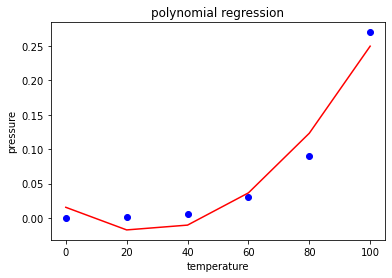

In [59]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x,y,color='blue')
plt.plot(x,y_pred,color='red')
plt.xlabel("temperature")
plt.ylabel("pressure")
plt.title("polynomial regression")
plt.show()

In [60]:
from sklearn import metrics
print("MSE: ",metrics.mean_squared_error(y,y_pred))
print("R2 score: ",metrics.r2_score(y,y_pred))
test_rmse=np.sqrt(metrics.mean_squared_error(y,y_pred))
print("RMSE: ",test_rmse)

MSE:  0.00040001033333333344
R2 score:  0.9568461098911795
RMSE:  0.020000258331664956


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=3)
model_poly=poly.fit_transform(x)
lr=LinearRegression()
lr.fit(model_poly,y)

LinearRegression()

In [62]:
y_pred=lr.predict(model_poly)
y_pred

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

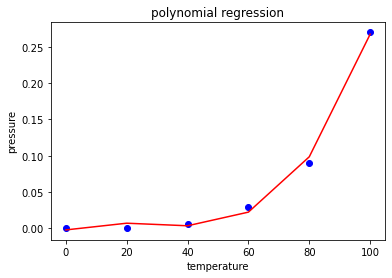

In [63]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x,y,color='blue')
plt.plot(x,y_pred,color='red')
plt.xlabel("temperature")
plt.ylabel("pressure")
plt.title("polynomial regression")
plt.show()

In [64]:
from sklearn import metrics
print("MSE: ",metrics.mean_squared_error(y,y_pred))
print("R2 score: ",metrics.r2_score(y,y_pred))
test_rmse=np.sqrt(metrics.mean_squared_error(y,y_pred))
print("RMSE: ",test_rmse)

MSE:  3.0875185185185266e-05
R2 score:  0.9966691251761722
RMSE:  0.005556544356449003


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=4)
model_poly=poly.fit_transform(x)
lr=LinearRegression()
lr.fit(model_poly,y)

y_pred=lr.predict(model_poly)
y_pred

array([ 4.61111118e-04, -1.05555554e-04,  8.61111111e-03,  2.73888889e-02,
        9.13055556e-02,  2.69738889e-01])

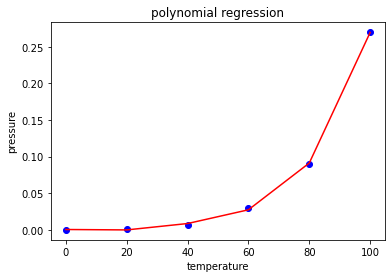

In [66]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x,y,color='blue')
plt.plot(x,y_pred,color='red')
plt.xlabel("temperature")
plt.ylabel("pressure")
plt.title("polynomial regression")
plt.show()

In [67]:
from sklearn import metrics
print("MSE: ",metrics.mean_squared_error(y,y_pred))
print("R2 score: ",metrics.r2_score(y,y_pred))
test_rmse=np.sqrt(metrics.mean_squared_error(y,y_pred))
print("RMSE: ",test_rmse)

MSE:  2.8635185185184793e-06
R2 score:  0.9996910780718014
RMSE:  0.001692193404584263
